In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier    
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


#importing date for labelling file
from datetime import datetime
date=datetime.today().strftime('%Y%m%d')
print('today date ', date)

plt.ioff() #prevent showing figure

today date  20230429


In [98]:
#importing training data to pandas dataframe

df=pd.read_csv(r'E:\phbs\module03\ml_finance\final_project\training.csv',index_col='id')
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#df['split'] = le.fit_transform(df.split.values)
df=df.drop(columns=['split'])
df['event'].replace({0:1, 1:0},inplace=True)

#df.dropna(thresh=3,inplace=True)

dfy=df['event'] #set the target column separate from dataframe

#df=df.drop("event" ,axis= 1)
df.fillna(df.mean(),inplace=True)

X=df.values
y=dfy.values

y_train=y

#importing training data to pandas dataframe
print('Default %:',dfy.sum()/df.shape[0]*100)

df

Default %: 2.5255824080121925


,event,var1,var2,var3,var4,var5,var6,var7,var8
id,,,,,,,,,
0,0,1.873951,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
1,0,1.873951,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
2,0,1.873951,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
3,0,1.000000,2.096510e+07,16.772031,11.586977,289.199746,28.430493,20.646794,62.750000
4,0,1.873951,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
...,...,...,...,...,...,...,...,...,...
238831,0,1.000000,6.523118e+04,16.772031,11.586977,289.199746,28.430493,20.646794,58.916667
238832,0,1.000000,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
238833,0,1.873951,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153


In [99]:
#importing TEST data to pandas dataframe

df1=pd.read_csv(r'E:\phbs\module03\ml_finance\final_project\test.csv',index_col='id')
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df1=df1.drop(columns=['split'])
df1['event'].replace({0:1, 1:0},inplace=True)

dfy1=df1['event']
#df1=df1.drop("event" ,axis= 1)

df1.fillna(df.mean(),inplace=True)
X1=df1.values
y1=dfy1.values

#importing training data to pandas dataframe
print('Default %:',dfy1.sum()/df1.shape[0]*100)

df1

Default %: 2.5004605670836892


,event,var1,var2,var3,var4,var5,var6,var7,var8
id,,,,,,,,,
0,0,1.000000,9.248254e+07,0.908051,13.000000,0.133592,0.027241,20.646794,73.041667
1,0,1.873951,5.989773e+06,16.772031,4.000000,289.199746,28.430493,20.646794,58.497153
2,0,1.000000,6.718715e+06,7.035461,13.000000,41.878073,-7.422937,20.646794,76.250000
3,0,1.000000,3.576348e+06,0.483255,13.000000,60.801780,28.430493,20.646794,80.083333
4,0,1.000000,8.443072e+06,16.772031,11.586977,0.525225,28.430493,20.646794,87.625000
...,...,...,...,...,...,...,...,...,...
59704,0,1.000000,1.060430e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
59705,0,1.873951,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
59706,0,1.000000,1.593264e+07,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153


In [100]:
# standard scaler
from sklearn.preprocessing import MinMaxScaler
scaler=StandardScaler()

#scaler=MinMaxScaler()
scaler.fit(df)

df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df1=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
df

,event,var1,var2,var3,var4,var5,var6,var7,var8
0,-0.160966,1.586520e-16,-9.270563e-16,-1.922909e-16,-8.974084e-16,-5.984703e-17,3.168381e-17,0.0,1.209891e-14
1,-0.160966,1.586520e-16,-9.270563e-16,-1.922909e-16,-8.974084e-16,-5.984703e-17,3.168381e-17,0.0,1.209891e-14
2,-0.160966,1.586520e-16,-9.270563e-16,-1.922909e-16,-8.974084e-16,-5.984703e-17,3.168381e-17,0.0,1.209891e-14
3,-0.160966,-3.122213e-01,6.211136e-01,-1.922909e-16,-8.974084e-16,-5.984703e-17,3.168381e-17,0.0,5.570476e-01
4,-0.160966,1.586520e-16,-9.270563e-16,-1.922909e-16,-8.974084e-16,-5.984703e-17,3.168381e-17,0.0,1.209891e-14
...,...,...,...,...,...,...,...,...,...
238831,-0.160966,-3.122213e-01,-2.457251e-01,-1.922909e-16,-8.974084e-16,-5.984703e-17,3.168381e-17,0.0,5.494885e-02
238832,-0.160966,-3.122213e-01,-9.270563e-16,-1.922909e-16,-8.974084e-16,-5.984703e-17,3.168381e-17,0.0,1.209891e-14
238833,-0.160966,1.586520e-16,-9.270563e-16,-1.922909e-16,-8.974084e-16,-5.984703e-17,3.168381e-17,0.0,1.209891e-14
238834,-0.160966,-3.122213e-01,-2.115987e-01,-2.446279e-01,7.138534e-01,-5.984703e-17,3.168381e-17,0.0,7.153179e-01


In [86]:
df

,event,var1,var2,var3,var4,var5,var6,var7,var8
0,0.0,0.0,0.000285,0.000148,1.0,0.000024,0.018679,1.0,0.363395
1,0.0,0.0,0.000285,0.000148,1.0,0.000024,0.018679,1.0,0.363395
2,0.0,0.0,0.000285,0.000148,1.0,0.000024,0.018679,1.0,0.363395
3,0.0,0.0,0.007441,0.000148,1.0,0.000024,0.018679,1.0,0.406720
4,0.0,0.0,0.000285,0.000148,1.0,0.000024,0.018679,1.0,0.363395
...,...,...,...,...,...,...,...,...,...
238831,0.0,0.0,0.000023,0.000148,1.0,0.000024,0.018679,1.0,0.366048
238832,0.0,0.0,0.000285,0.000148,1.0,0.000024,0.018679,1.0,0.363395
238833,0.0,0.0,0.000285,0.000148,1.0,0.000024,0.018679,1.0,0.363395
238834,0.0,0.0,0.000315,0.000316,1.0,0.000024,0.018679,1.0,0.419540


In [101]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=123)


X_train=df.drop(['event'] ,axis= 1)

X_bal, y_bal = sm.fit_resample(X_train, y_train)

#check the data label balance
plt.title('Data after SMOTE')
plt.hist(y_bal)

#plt.savefig('images/data_upsample_dist.png', dpi=300)



(array([232804.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 232804.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

In [102]:
X_train=X_bal
X_test=df1
y_train=y_bal
y_test=y1

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(465608, 8)
(59709, 9)
(465608,)
(59709,)


In [103]:
X_train=pd.DataFrame(X_train,columns=df.columns[1:])
X_test.drop("event" ,axis= 1,inplace=True)
X_train

,var1,var2,var3,var4,var5,var6,var7,var8
0,1.586520e-16,-9.270563e-16,-1.922909e-16,-8.974084e-16,-5.984703e-17,3.168381e-17,0.000000,1.209891e-14
1,1.586520e-16,-9.270563e-16,-1.922909e-16,-8.974084e-16,-5.984703e-17,3.168381e-17,0.000000,1.209891e-14
2,1.586520e-16,-9.270563e-16,-1.922909e-16,-8.974084e-16,-5.984703e-17,3.168381e-17,0.000000,1.209891e-14
3,-3.122213e-01,6.211136e-01,-1.922909e-16,-8.974084e-16,-5.984703e-17,3.168381e-17,0.000000,5.570476e-01
4,1.586520e-16,-9.270563e-16,-1.922909e-16,-8.974084e-16,-5.984703e-17,3.168381e-17,0.000000,1.209891e-14
...,...,...,...,...,...,...,...,...
465603,-3.122213e-01,-9.270563e-16,-1.922909e-16,-5.348499e+00,-5.984703e-17,3.168381e-17,0.000000,1.209891e-14
465604,1.586520e-16,-9.270563e-16,-1.922909e-16,-8.974084e-16,-5.984703e-17,3.168381e-17,0.000000,1.209891e-14
465605,1.586520e-16,-9.270563e-16,-1.922909e-16,-8.974084e-16,-5.984703e-17,3.168381e-17,0.000000,1.209891e-14
465606,-3.122213e-01,-2.396563e-01,-2.937784e-01,7.138534e-01,-5.984703e-17,3.168381e-17,1.528459,-2.512435e+00


In [104]:
#Drop var 6, var 7
'''X_train.drop(['var6', 'var7'], axis=1,inplace=True)
X_test.drop(['var6', 'var7'], axis=1,inplace=True)'''

"X_train.drop(['var6', 'var7'], axis=1,inplace=True)\nX_test.drop(['var6', 'var7'], axis=1,inplace=True)"

In [105]:
X_test

,var1,var2,var3,var4,var5,var6,var7,var8
0,-0.309636,3.825390,-0.306801,0.717703,-0.445591,-0.347469,-0.003542,1.896037
1,-0.001185,-0.002975,-0.000249,-3.870399,-0.000694,0.003744,-0.003542,-0.001174
2,-0.309636,0.029290,-0.188397,0.717703,-0.381343,-0.439593,-0.003542,2.314537
3,-0.309636,-0.109798,-0.315010,0.717703,-0.352218,0.003744,-0.003542,2.814564
4,-0.309636,0.105614,-0.000249,-0.002641,-0.444988,0.003744,-0.003542,3.798312
...,...,...,...,...,...,...,...,...
59704,-0.309636,-0.221159,-0.000249,-0.002641,-0.000694,0.003744,-0.003542,-0.001174
59705,-0.001185,-0.002975,-0.000249,-0.002641,-0.000694,0.003744,-0.003542,-0.001174
59706,-0.309636,0.437119,-0.000249,-0.002641,-0.000694,0.003744,-0.003542,-0.001174
59707,-0.001185,-0.002975,-0.000249,-0.002641,-0.000694,0.003744,-0.003542,-0.001174


## LR gridsearch

In [51]:
#Logistic regression grid search

pipe_lr = make_pipeline(LogisticRegression(random_state=1, solver='lbfgs'))


param_range = [.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'logisticregression__C': param_range}]

for i in X_train.columns:
    gs = GridSearchCV(estimator=pipe_lr, 
                      param_grid=param_grid, 
                      scoring='roc_auc', 
                      refit=True,
                      cv=5,
                      n_jobs=-1)
    gs = gs.fit(pd.DataFrame(X_train[i]), y_train)
    print(i)
    print(gs.best_score_)
    print(gs.best_params_)

var1
0.5367512399927217
{'logisticregression__C': 0.001}
var2
0.6031097329997864
{'logisticregression__C': 0.001}
var3
0.5750612637967172
{'logisticregression__C': 0.001}
var4
0.5862370348015984
{'logisticregression__C': 0.001}
var5
0.49825676917356987
{'logisticregression__C': 0.001}
var6
0.4998361604416006
{'logisticregression__C': 0.001}
var7
0.5113545659213239
{'logisticregression__C': 0.001}
var8
0.5434373906283821
{'logisticregression__C': 10.0}


In [17]:
X_train.columns

Index(['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8'], dtype='object')

0.8876216315798289
              precision    recall  f1-score   support

           0     0.9769    0.9061    0.9402     58216
           1     0.0432    0.1654    0.0686      1493

    accuracy                         0.8876     59709
   macro avg     0.5101    0.5358    0.5044     59709
weighted avg     0.9536    0.8876    0.9184     59709

images/20230429_conmat_LR_var1.png


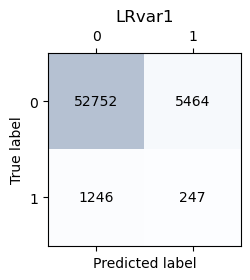

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


 
listfeature=['var1']

clf = LogisticRegression(penalty='l2', 
                          C=1e-3,
                          solver='lbfgs',
                          random_state=1)

clf.fit(X_train[listfeature], y_train)

print(clf.score(X_test[listfeature],y_test))
print(classification_report(y_test, clf.predict(X_test[listfeature]),digits=4))

confmat = confusion_matrix(y_test, clf.predict(X_test[listfeature]))
#print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('LR'+''.join(listfeature))
print('images/'+date+'_conmat_LR_'+''.join(listfeature)+'.png')
plt.savefig('images/'+date+'_conmat_LR_'+''.join(listfeature)+'.png', dpi=300)
plt.show()

In [109]:
listfeature1=[]
label=X_train.columns 
# A Python program to print all
# combinations of a given length
from itertools import combinations
 
# Get all combinations of [1, 2, 3]
# and length 2

#comb = combinations(label, 2)
max_element=1
for n in range(1,max_element+1):    #len(label) + 1):
    comb = combinations(label, n)
    for i in list(comb):
        listfeature1.append(list(i))

print(listfeature1)

[['var1'], ['var2'], ['var3'], ['var4'], ['var5'], ['var6'], ['var7'], ['var8']]


## make dictionary variable

In [94]:
dfclassification_result=pd.DataFrame(columns=['variable','precision','recall','f1','auc','auc+f1+prec',
                                              'data_fill','transformation','resample','classifier'])

# Trying combinations LR

In [106]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')
clr = ['black', 'orange', 'blue', 'green']
ls = [':', '--', '-.', '-']

data_fill='mean'
resample='SMOTE'
classifier='LR'
transformation='stdscl'

#listfeature=['var3_woe','var1_woe']
for listfeature in listfeature1:
    clf = LogisticRegression(penalty='l2', 
                              C=1e-3,
                              solver='lbfgs',
                              random_state=1)

    clf.fit(X_train[listfeature], y_train)
    y_pred = clf.fit(X_train[listfeature],y_train).predict_proba(X_test[listfeature])[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    #roc_auc = auc(x=fpr, y=tpr)
    
                     
    confmat = confusion_matrix(y_test, clf.predict(X_test[listfeature]))
    #print(confmat)
    
    print(','.join(listfeature))                 
    print('Score\t: ',clf.score(X_test[listfeature],y_test))
    print('ROC AUC\t: ',auc,'\n')
    
    
    cr=classification_report(y_test, clf.predict(X_test[listfeature]),digits=4,output_dict=True)
    #print(cr)

    dfclassification_result=dfclassification_result.append({'variable':','.join(listfeature),
                                                            'precision':cr['weighted avg']['precision'],
                                                            'recall':cr['weighted avg']['recall'],
                                                            'f1':cr['weighted avg']['f1-score'],
                                                           'auc':auc,
                                                            'data_fill':data_fill,
                                                            'resample':resample,
                                                            'classifier':classifier,
                                                            'transformation':transformation,
                                                            'auc+f1+prec':cr['weighted avg']['precision']+cr['weighted avg']['f1-score']+auc
                                                           },
                                                           ignore_index=True)    
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.title(data_fill+' '+classifier+' '+resample+' '+transformation+' '+' '.join(listfeature))
    plt.savefig('images/'+date+'_conmat_'+data_fill+'_'+classifier+'_'+resample+'_'+transformation+'_'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show()
    plt.clf()
    
    
    fig, ax = plt.subplots(figsize=(4, 3))
    plt.plot(fpr, tpr,
         color='red',
         #linestyle=ls,
         label='%s (auc = %0.2f)' % (' '.join(listfeature), auc))
    
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1],
             linestyle='--',
             color='gray',
             linewidth=2)

    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.grid(alpha=0.5)
    plt.xlabel('False positive rate (FPR)')
    plt.ylabel('True positive rate (TPR)')
    plt.title(data_fill+' '+classifier+' '+resample+' '+transformation+' '+' '.join(listfeature))
    plt.savefig('images/'+date+'_TPRvsVPR_'+data_fill+'_'+classifier+'_'+resample+'_'+transformation+'_'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show() 
    
plt.ioff() #prevent showing figure

var1
Score	:  0.9220218057579259
ROC AUC	:  0.5687123138247371 

var2
Score	:  0.5997588303270863
ROC AUC	:  0.5389186916986338 

var3
Score	:  0.8183690900869216
ROC AUC	:  0.5169019427015964 

var4
Score	:  0.9365254819206484
ROC AUC	:  0.6413925399286726 

var5
Score	:  0.028220201309685305
ROC AUC	:  0.489724941486361 

var6
Score	:  0.950526721264801
ROC AUC	:  0.4925639885495603 

var7
Score	:  0.9499405449764692
ROC AUC	:  0.5121959023470898 

var8
Score	:  0.7836172101358254
ROC AUC	:  0.5506454828225457 

var1,var2
Score	:  0.6545244435512234
ROC AUC	:  0.5466578044432719 

var1,var3
Score	:  0.7986065752231657
ROC AUC	:  0.5554376460770021 

var1,var4
Score	:  0.9265437371250566
ROC AUC	:  0.6579442268767234 

var1,var5
Score	:  0.9220218057579259
ROC AUC	:  0.5648356615605545 

var1,var6
Score	:  0.9220218057579259
ROC AUC	:  0.566098206821242 

var1,var7
Score	:  0.9103317757791958
ROC AUC	:  0.5764169912157519 

var1,var8
Score	:  0.7890602756703344
ROC AUC	:  0.5677497346

# Decision Tree

In [107]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')
clr = ['black', 'orange', 'blue', 'green']
ls = [':', '--', '-.', '-']

data_fill='mean'
resample='SMOTE'
classifier='DT'
transformation='stdscl'

#listfeature=['var3_woe','var1_woe']
for listfeature in listfeature1:
    clf = DecisionTreeClassifier(max_depth=5,
                              criterion='entropy',
                              random_state=1)

    clf.fit(X_train[listfeature], y_train)
    y_pred = clf.fit(X_train[listfeature],y_train).predict_proba(X_test[listfeature])[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    #roc_auc = auc(x=fpr, y=tpr)
    
                     
    confmat = confusion_matrix(y_test, clf.predict(X_test[listfeature]))
    #print(confmat)
    
    print(','.join(listfeature))                 
    print('Score\t: ',clf.score(X_test[listfeature],y_test))
    print('ROC AUC\t: ',auc,'\n')
    
    
    cr=classification_report(y_test, clf.predict(X_test[listfeature]),digits=4,output_dict=True)
    #print(cr)

    dfclassification_result=dfclassification_result.append({'variable':','.join(listfeature),
                                                            'precision':cr['weighted avg']['precision'],
                                                            'recall':cr['weighted avg']['recall'],
                                                            'f1':cr['weighted avg']['f1-score'],
                                                           'auc':auc,
                                                            'data_fill':data_fill,
                                                            'resample':resample,
                                                            'classifier':classifier,
                                                            'transformation':transformation,
                                                            'auc+f1+prec':cr['weighted avg']['precision']+cr['weighted avg']['f1-score']+auc
                                                           },
                                                           ignore_index=True)    
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.title(data_fill+' '+classifier+' '+resample+' '+transformation+' '+' '.join(listfeature))
    plt.savefig('images/'+date+'_conmat_'+data_fill+'_'+classifier+'_'+resample+'_'+transformation+'_'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show()
    plt.clf()
    
    
    fig, ax = plt.subplots(figsize=(4, 3))
    plt.plot(fpr, tpr,
         color='red',
         #linestyle=ls,
         label='%s (auc = %0.2f)' % (' '.join(listfeature), auc))
    
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1],
             linestyle='--',
             color='gray',
             linewidth=2)

    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.grid(alpha=0.5)
    plt.xlabel('False positive rate (FPR)')
    plt.ylabel('True positive rate (TPR)')
    plt.title(data_fill+' '+classifier+' '+resample+' '+transformation+' '+' '.join(listfeature))
    plt.savefig('images/'+date+'_TPRvsVPR_'+data_fill+'_'+classifier+'_'+resample+'_'+transformation+'_'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show() 
    
plt.ioff() #prevent showing figure

var1
Score	:  0.025004605670836892
ROC AUC	:  0.4700684811378941 

var2
Score	:  0.23597782578840712
ROC AUC	:  0.5947340796834772 

var3
Score	:  0.09904704483411211
ROC AUC	:  0.5133223226874973 

var4
Score	:  0.2888676748898826
ROC AUC	:  0.5295813724088806 

var5
Score	:  0.05791421728717614
ROC AUC	:  0.5119419631865476 

var6
Score	:  0.04989197608400744
ROC AUC	:  0.50783246672369 

var7
Score	:  0.9500075365522785
ROC AUC	:  0.5127291613531371 

var8
Score	:  0.2976770671088111
ROC AUC	:  0.5897224241273992 

var1,var2
Score	:  0.09350349193588907
ROC AUC	:  0.5710757319140646 

var1,var3
Score	:  0.7897469393223802
ROC AUC	:  0.519954470548787 

var1,var4
Score	:  0.2821852652029007
ROC AUC	:  0.6373435153063248 

var1,var5
Score	:  0.06980522199333433
ROC AUC	:  0.4822561341871061 

var1,var6
Score	:  0.06491483695925238
ROC AUC	:  0.47938129414524894 

var1,var7
Score	:  0.04938953926543737
ROC AUC	:  0.4707059321126735 

var1,var8
Score	:  0.10395417776214641
ROC AUC	:  0.

lama belum diganti

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')
clr = ['black', 'orange', 'blue', 'green']
ls = [':', '--', '-.', '-']

#listfeature=['var3_woe','var1_woe']
for listfeature in listfeature1:
    clf = DecisionTreeClassifier(max_depth=5,
                              criterion='entropy',
                              random_state=1)

    clf.fit(X_train[listfeature], y_train)
    y_pred = clf.fit(X_train[listfeature],y_train).predict_proba(X_test[listfeature])[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    #roc_auc = auc(x=fpr, y=tpr)
    
                     
    confmat = confusion_matrix(y_test, clf.predict(X_test[listfeature]))
    #print(confmat)
    
    print(','.join(listfeature))                 
    print('Score\t: ',clf.score(X_test[listfeature],y_test))
    print('ROC AUC\t: ',auc,'\n')
    
    
    cr=classification_report(y_test, clf.predict(X_test[listfeature]),digits=4,output_dict=True)
    #print(cr)

    dfclassification_result=dfclassification_result.append({'variable':','.join(listfeature),
                                                            'precision':cr['weighted avg']['precision'],
                                                            'recall':cr['weighted avg']['recall'],
                                                            'f1':cr['weighted avg']['f1-score'],
                                                           'auc':auc},
                                                           ignore_index=True)    
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.title('DT SMOTE '+' '.join(listfeature))
    plt.savefig('images/20230421_confusion_matrix_DT_SMOTE_'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show()
    plt.clf()
    
    
    fig, ax = plt.subplots(figsize=(4, 3))
    plt.plot(fpr, tpr,
         color='red',
         #linestyle=ls,
         label='%s (auc = %0.2f)' % (' '.join(listfeature), auc))
    
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1],
             linestyle='--',
             color='gray',
             linewidth=2)

    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.grid(alpha=0.5)
    plt.xlabel('False positive rate (FPR)')
    plt.ylabel('True positive rate (TPR)')
    plt.title('DT SMOTE '+' '.join(listfeature))
    plt.savefig('images/20230421_TPRvsFPR_DT_SMOTE'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show() 
    
plt.ioff() #prevent showing figure

var1
Score	:  0.8876216315798289
ROC AUC	:  0.5341794528099203 

var2
Score	:  0.24801956154013632
ROC AUC	:  0.5981621289162072 

var3
Score	:  0.11360096467869166
ROC AUC	:  0.5636643763148828 

var4
Score	:  0.025004605670836892
ROC AUC	:  0.4206813096267764 

var5
Score	:  0.973689058600881
ROC AUC	:  0.501721549080538 

var6
Score	:  0.974442713828736
ROC AUC	:  0.49842941767274357 

var7
Score	:  0.028906864961731064
ROC AUC	:  0.4940458822956584 

var8
Score	:  0.299720310170996
ROC AUC	:  0.5918445071089389 

var1,var2
Score	:  0.22199333433820698
ROC AUC	:  0.5981615996725501 

var1,var3
Score	:  0.10884456279622838
ROC AUC	:  0.5788934948683155 

var1,var4
Score	:  0.025004605670836892
ROC AUC	:  0.4241442199091155 

var1,var5
Score	:  0.9380160444824064
ROC AUC	:  0.531933728155238 

var1,var6
Score	:  0.9392051449530222
ROC AUC	:  0.5274838877521144 

var1,var7
Score	:  0.03980974392470147
ROC AUC	:  0.47300725036197966 

var1,var8
Score	:  0.3796580080054933
ROC AUC	:  0.6

# Random forest classifier

In [110]:
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')
clr = ['black', 'orange', 'blue', 'green']
ls = [':', '--', '-.', '-']

data_fill='mean'
resample='SMOTE'
classifier='RFC'
transformation='stdscl'

clf = RandomForestClassifier(random_state=123)

for listfeature in listfeature1:
    clf.fit(X_train[listfeature], y_train)
    y_pred = clf.fit(X_train[listfeature],y_train).predict_proba(X_test[listfeature])[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    #roc_auc = auc(x=fpr, y=tpr)
    
                     
    confmat = confusion_matrix(y_test, clf.predict(X_test[listfeature]))
    #print(confmat)
    
    print(','.join(listfeature))                 
    print('Score\t: ',clf.score(X_test[listfeature],y_test))
    print('ROC AUC\t: ',auc,'\n')
    
    
    cr=classification_report(y_test, clf.predict(X_test[listfeature]),digits=4,output_dict=True)
    #print(cr)

    dfclassification_result=dfclassification_result.append({'variable':','.join(listfeature),
                                                            'precision':cr['weighted avg']['precision'],
                                                            'recall':cr['weighted avg']['recall'],
                                                            'f1':cr['weighted avg']['f1-score'],
                                                           'auc':auc,
                                                            'data_fill':data_fill,
                                                            'resample':resample,
                                                            'classifier':classifier,
                                                            'transformation':transformation,
                                                            'auc+f1+prec':cr['weighted avg']['precision']+cr['weighted avg']['f1-score']+auc
                                                           },
                                                           ignore_index=True)    
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.title(data_fill+' '+classifier+' '+resample+' '+transformation+' '+' '.join(listfeature))
    plt.savefig('images/'+date+'_conmat_'+data_fill+'_'+classifier+'_'+resample+'_'+transformation+'_'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show()
    plt.clf()
    
    
    fig, ax = plt.subplots(figsize=(4, 3))
    plt.plot(fpr, tpr,
         color='red',
         #linestyle=ls,
         label='%s (auc = %0.2f)' % (' '.join(listfeature), auc))
    
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1],
             linestyle='--',
             color='gray',
             linewidth=2)

    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.grid(alpha=0.5)
    plt.xlabel('False positive rate (FPR)')
    plt.ylabel('True positive rate (TPR)')
    plt.title(data_fill+' '+classifier+' '+resample+' '+transformation+' '+' '.join(listfeature))
    plt.savefig('images/'+date+'_TPRvsVPR_'+data_fill+'_'+classifier+'_'+resample+'_'+transformation+'_'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show() 
    
plt.ioff() #prevent showing figure

var1
Score	:  0.0250548493526939
ROC AUC	:  0.4993904091016655 

var2
Score	:  0.6706024217454655
ROC AUC	:  0.5292334349726603 

var3
Score	:  0.09038838366075466
ROC AUC	:  0.5358093564479963 

var4
Score	:  0.2888676748898826
ROC AUC	:  0.5353935032441716 

var5
Score	:  0.05749551993836775
ROC AUC	:  0.5120653805064006 

var6
Score	:  0.04980823661424576
ROC AUC	:  0.5077392795714434 

var7
Score	:  0.1056457150513323
ROC AUC	:  0.5064764926995209 

var8
Score	:  0.0622351739268787
ROC AUC	:  0.540749403036165 



lama rfc

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')
clr = ['black', 'orange', 'blue', 'green']
ls = [':', '--', '-.', '-']

#listfeature=['var3_woe','var1_woe']
for listfeature in listfeature1:
    clf = RandomForestClassifier(random_state=123)

    clf.fit(X_train[listfeature], y_train)
    y_pred = clf.fit(X_train[listfeature],y_train).predict_proba(X_test[listfeature])[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    #roc_auc = auc(x=fpr, y=tpr)
    
                     
    confmat = confusion_matrix(y_test, clf.predict(X_test[listfeature]))
    #print(confmat)
    
    print(','.join(listfeature))                 
    print('Score\t: ',clf.score(X_test[listfeature],y_test))
    print('ROC AUC\t: ',auc,'\n')
    
    
    cr=classification_report(y_test, clf.predict(X_test[listfeature]),digits=4,output_dict=True)
    #print(cr)

    dfclassification_result=dfclassification_result.append({'variable':','.join(listfeature),
                                                            'precision':cr['weighted avg']['precision'],
                                                            'recall':cr['weighted avg']['recall'],
                                                            'f1':cr['weighted avg']['f1-score'],
                                                           'auc':auc},
                                                           ignore_index=True)    
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.title('RF '+' '.join(listfeature))
    plt.savefig('images/20230421_confusion_matrix_RFC_'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show()
    plt.clf()
    
    
    fig, ax = plt.subplots(figsize=(4, 3))
    plt.plot(fpr, tpr,
         color='red',
         #linestyle=ls,
         label='%s (auc = %0.2f)' % (' '.join(listfeature), auc))
    
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1],
             linestyle='--',
             color='gray',
             linewidth=2)

    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.grid(alpha=0.5)
    plt.xlabel('False positive rate (FPR)')
    plt.ylabel('True positive rate (TPR)')
    plt.title('RF '+' '.join(listfeature))
    plt.savefig('images/20230421_TPRvsFPR_RFC_'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show() 
    
plt.ioff() #prevent showing figure

In [64]:
#save result

dfclassification_result.to_csv('classification_result_DTSMOTE_standardscaler.csv')

https://machinelearningmastery.com/calculate-feature-importance-with-python/

Feature: 0, Score: 0.09448
Feature: 1, Score: 0.13988
Feature: 2, Score: 0.10728
Feature: 3, Score: 0.37710
Feature: 4, Score: 0.10467
Feature: 5, Score: 0.02838
Feature: 6, Score: 0.06738
Feature: 7, Score: 0.08083


<Figure size 250x250 with 0 Axes>

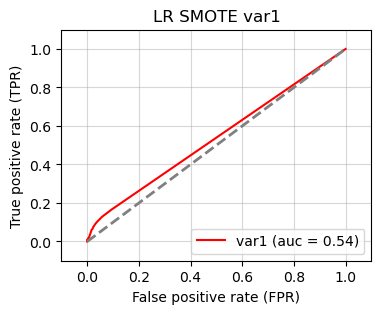

<Figure size 250x250 with 0 Axes>

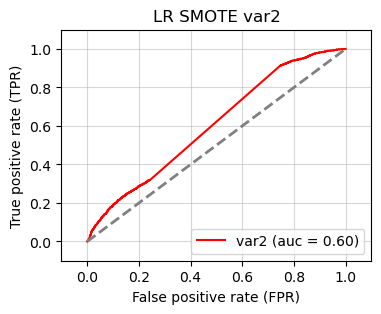

<Figure size 250x250 with 0 Axes>

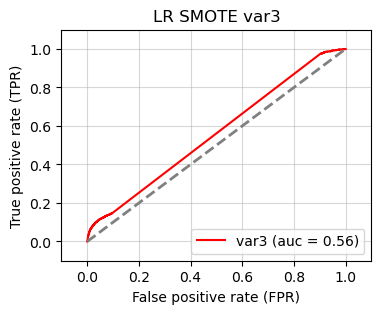

<Figure size 250x250 with 0 Axes>

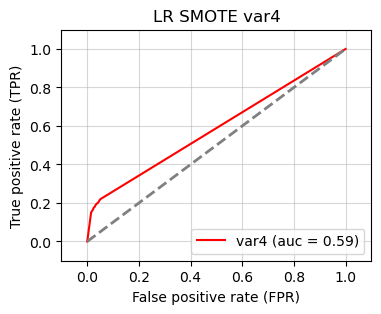

<Figure size 250x250 with 0 Axes>

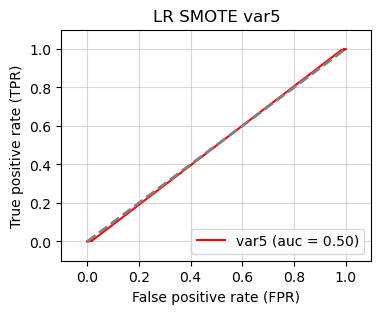

<Figure size 250x250 with 0 Axes>

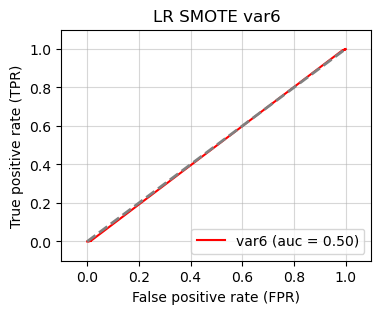

<Figure size 250x250 with 0 Axes>

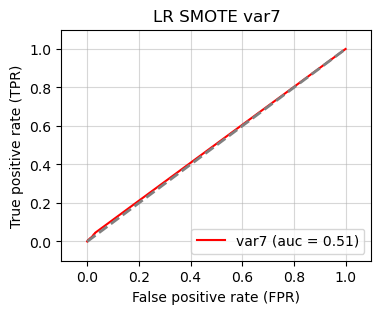

<Figure size 250x250 with 0 Axes>

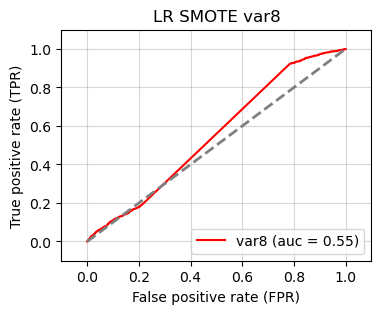

<Figure size 250x250 with 0 Axes>

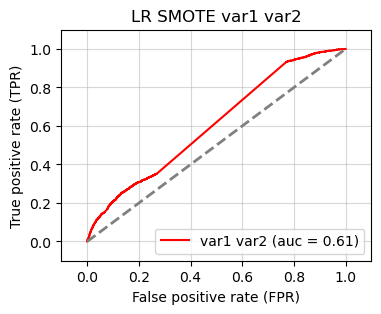

<Figure size 250x250 with 0 Axes>

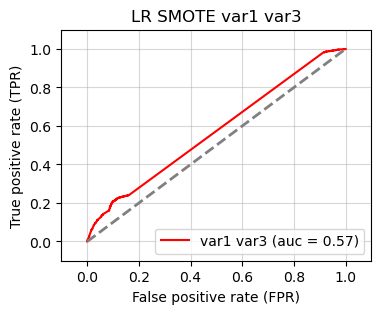

<Figure size 250x250 with 0 Axes>

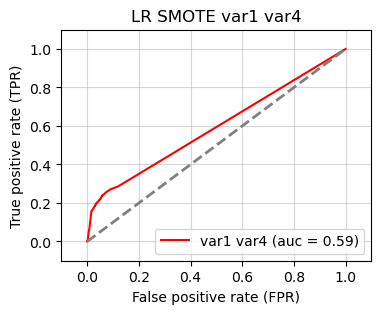

<Figure size 250x250 with 0 Axes>

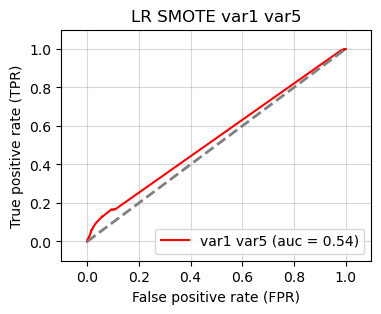

<Figure size 250x250 with 0 Axes>

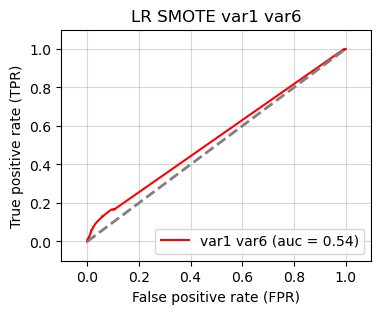

<Figure size 250x250 with 0 Axes>

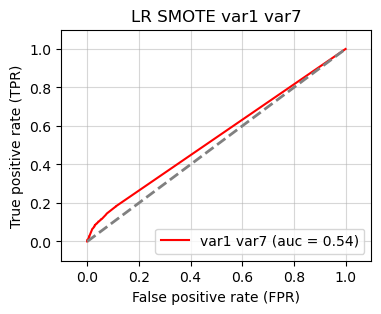

<Figure size 250x250 with 0 Axes>

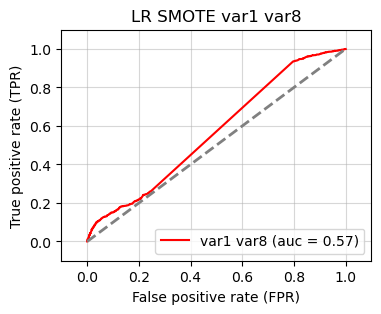

<Figure size 250x250 with 0 Axes>

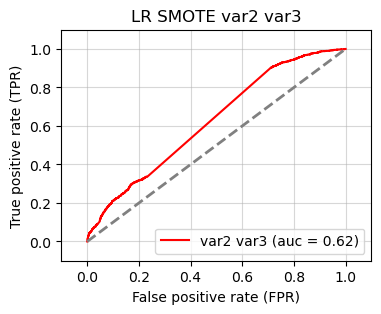

<Figure size 250x250 with 0 Axes>

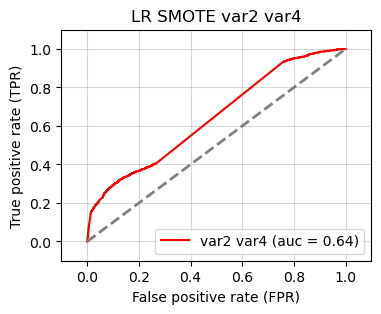

<Figure size 250x250 with 0 Axes>

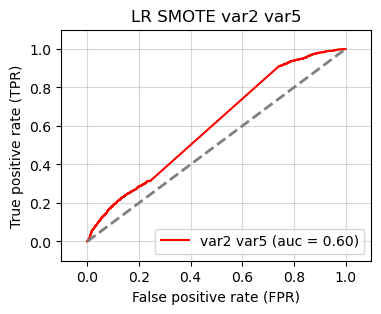

<Figure size 250x250 with 0 Axes>

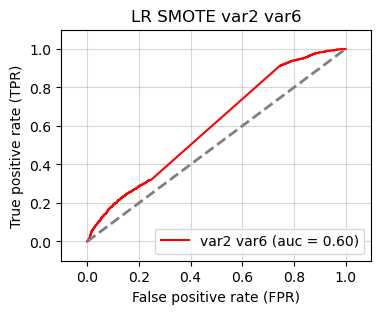

<Figure size 250x250 with 0 Axes>

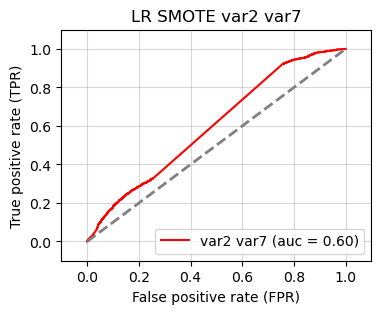

<Figure size 250x250 with 0 Axes>

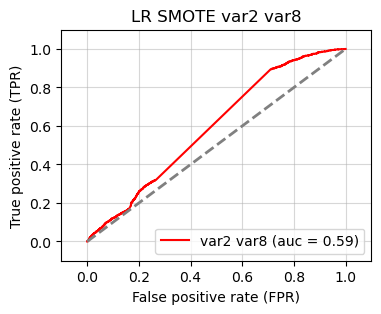

<Figure size 250x250 with 0 Axes>

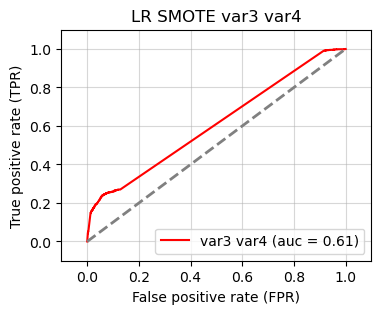

<Figure size 250x250 with 0 Axes>

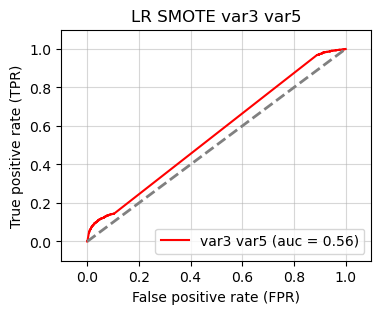

<Figure size 250x250 with 0 Axes>

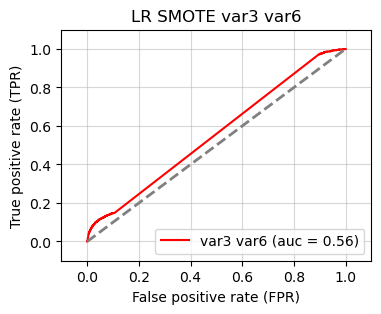

<Figure size 250x250 with 0 Axes>

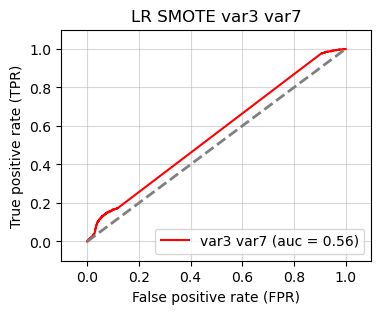

<Figure size 250x250 with 0 Axes>

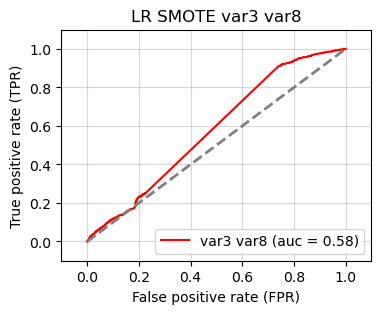

<Figure size 250x250 with 0 Axes>

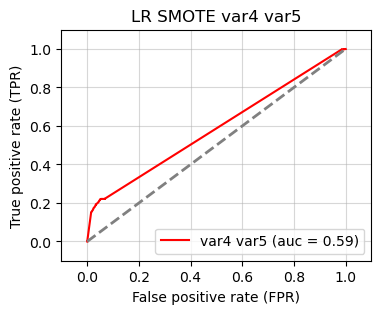

<Figure size 250x250 with 0 Axes>

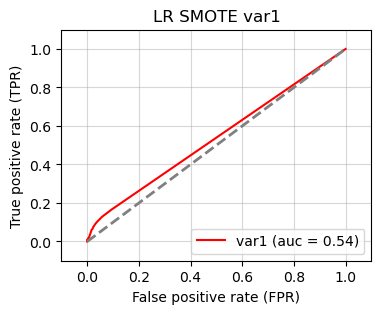

<Figure size 250x250 with 0 Axes>

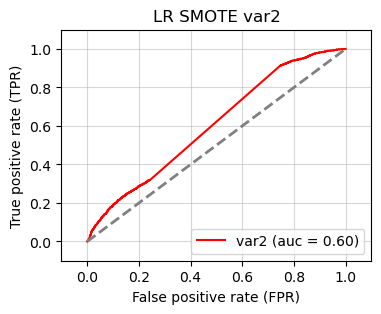

<Figure size 250x250 with 0 Axes>

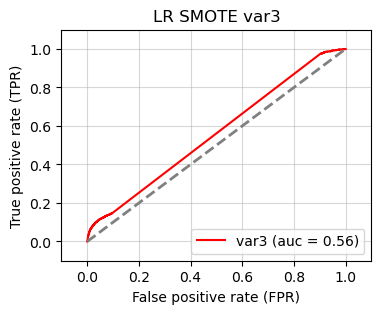

<Figure size 250x250 with 0 Axes>

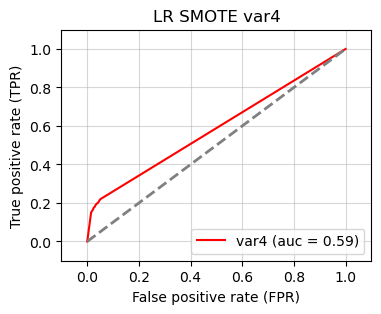

<Figure size 250x250 with 0 Axes>

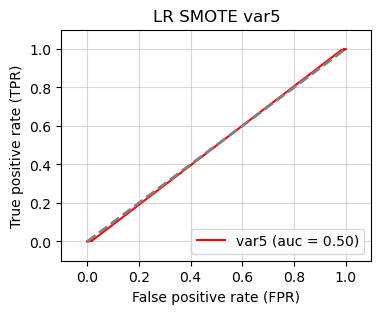

<Figure size 250x250 with 0 Axes>

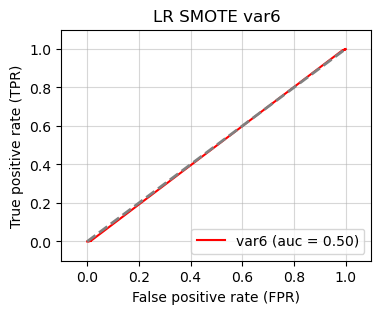

<Figure size 250x250 with 0 Axes>

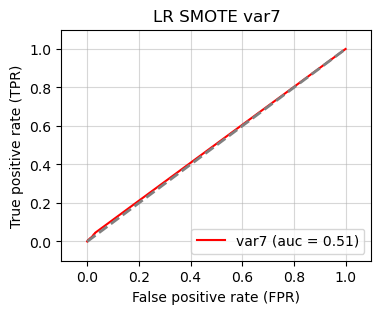

<Figure size 250x250 with 0 Axes>

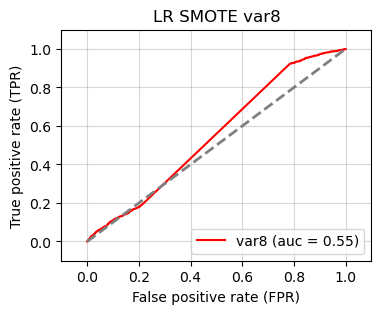

<Figure size 250x250 with 0 Axes>

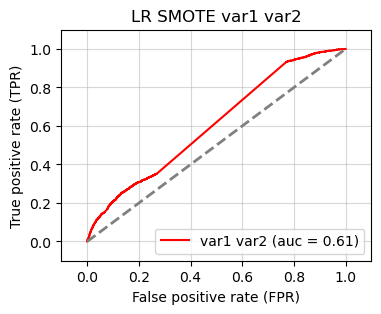

<Figure size 250x250 with 0 Axes>

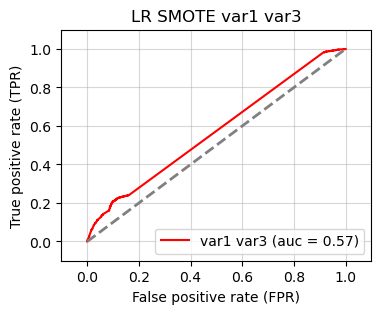

<Figure size 250x250 with 0 Axes>

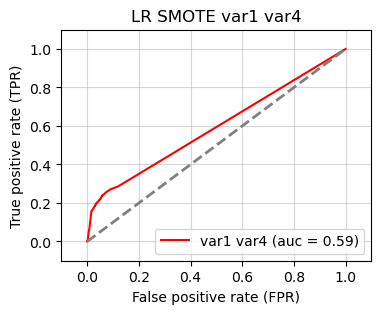

<Figure size 250x250 with 0 Axes>

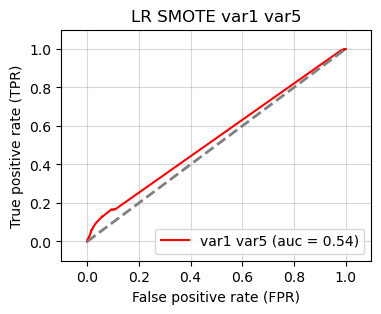

<Figure size 250x250 with 0 Axes>

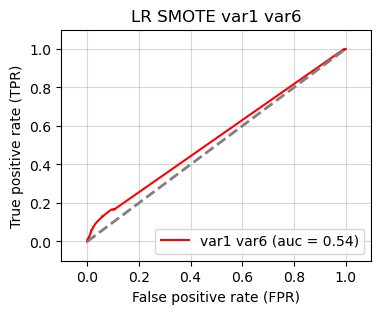

<Figure size 250x250 with 0 Axes>

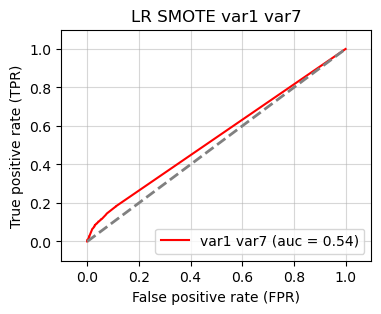

<Figure size 250x250 with 0 Axes>

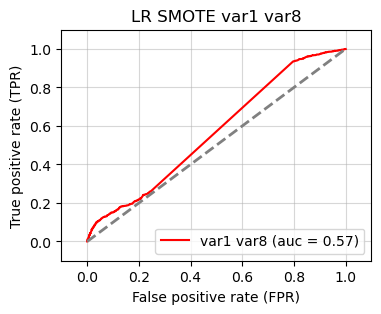

<Figure size 250x250 with 0 Axes>

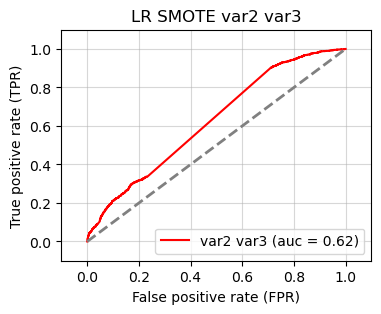

<Figure size 250x250 with 0 Axes>

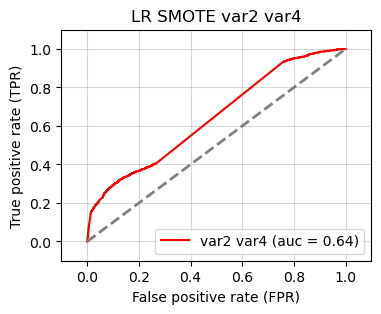

<Figure size 250x250 with 0 Axes>

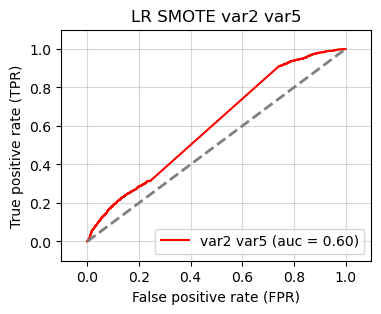

<Figure size 250x250 with 0 Axes>

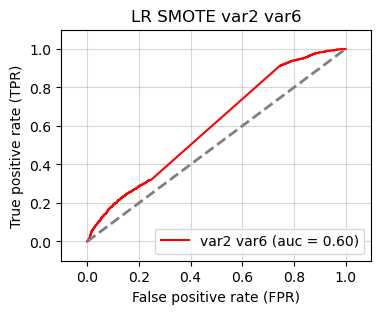

<Figure size 250x250 with 0 Axes>

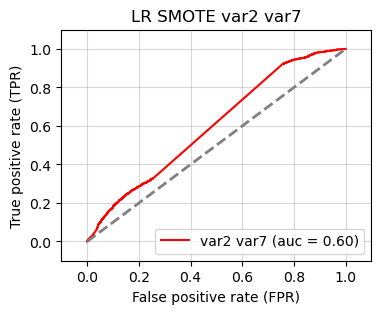

<Figure size 250x250 with 0 Axes>

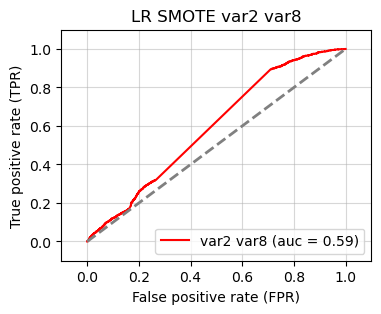

<Figure size 250x250 with 0 Axes>

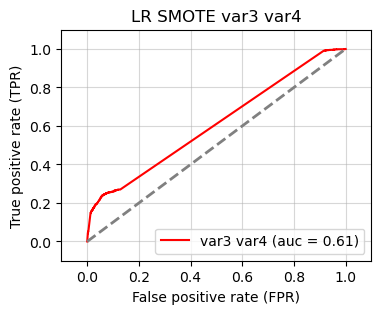

<Figure size 250x250 with 0 Axes>

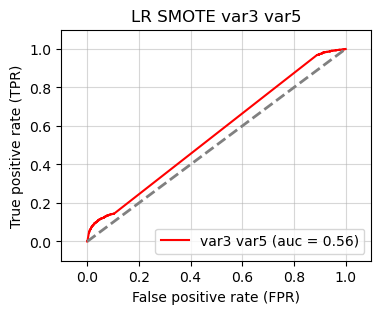

<Figure size 250x250 with 0 Axes>

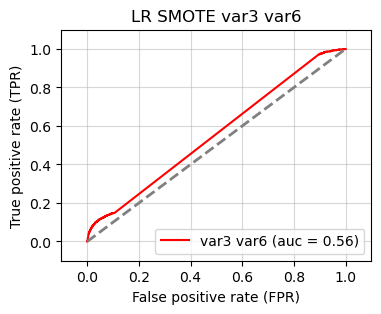

<Figure size 250x250 with 0 Axes>

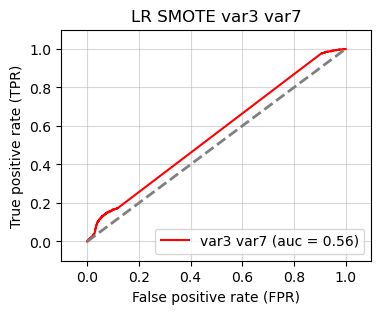

<Figure size 250x250 with 0 Axes>

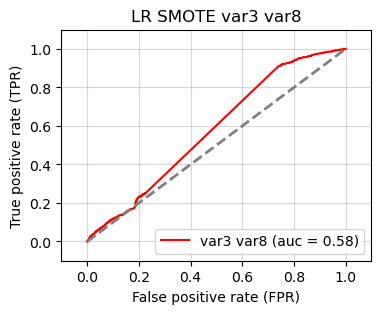

<Figure size 250x250 with 0 Axes>

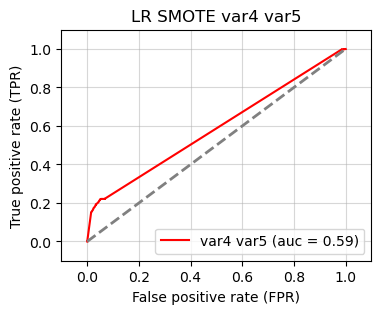

<Figure size 250x250 with 0 Axes>

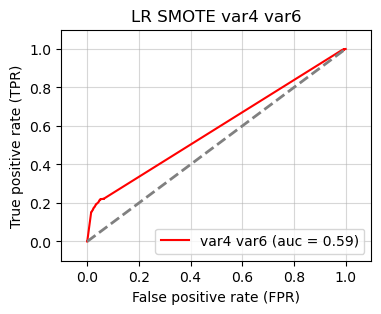

<Figure size 250x250 with 0 Axes>

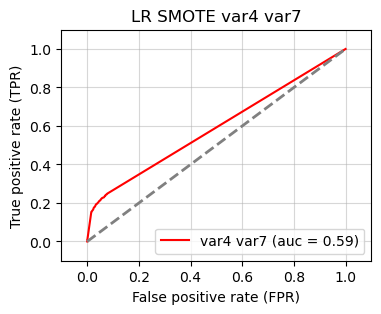

<Figure size 250x250 with 0 Axes>

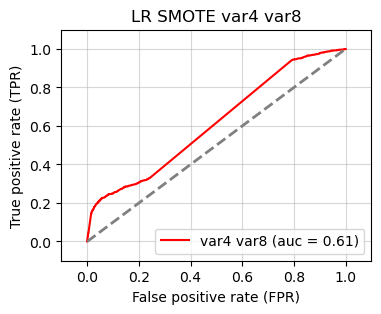

<Figure size 250x250 with 0 Axes>

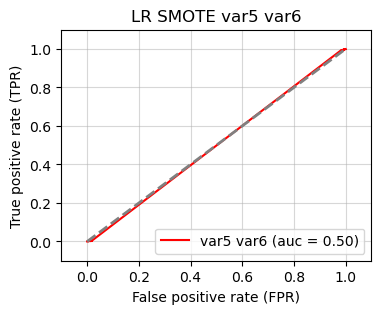

<Figure size 250x250 with 0 Axes>

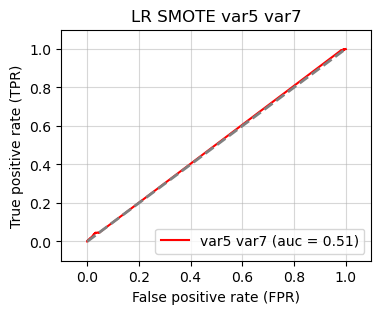

<Figure size 250x250 with 0 Axes>

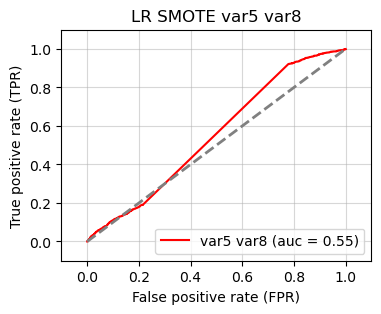

<Figure size 250x250 with 0 Axes>

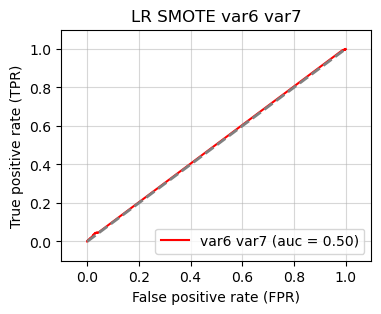

<Figure size 250x250 with 0 Axes>

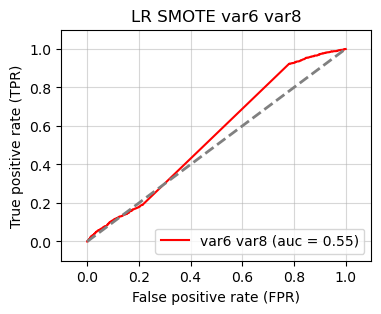

<Figure size 250x250 with 0 Axes>

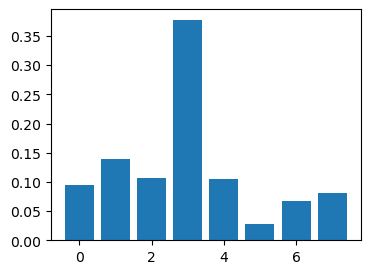

In [35]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot

# define the model
model = XGBClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.clf() 
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [111]:

'''
############
# For interactive pandas table view

#!pip install qgrid

import qgrid
widget = qgrid.show_grid(dfclassification_result,show_toolbar = True)
widget
############
'''

dfclassification_result.sort_values('auc+f1+prec',ascending=False).head(25)

,variable,precision,recall,f1,auc,auc+f1+prec,data_fill,transformation,resample,classifier
88,"var2,var4",0.957380,0.934532,0.945316,0.657773,2.560470,mean,stdscl,SMOTE,LR
82,"var1,var4",0.957483,0.926544,0.941003,0.657944,2.556430,mean,stdscl,SMOTE,LR
93,"var3,var4",0.957431,0.935219,0.945708,0.644716,2.547855,mean,stdscl,SMOTE,LR
52,"var2,var4",0.957791,0.945486,0.951383,0.638117,2.547291,median,minmax,SMOTE,DT
16,"var2,var4",0.957368,0.933394,0.944694,0.644129,2.546191,median,minmax,SMOTE,LR
75,var4,0.957343,0.936525,0.946381,0.641393,2.545116,mean,stdscl,SMOTE,LR
100,"var4,var7",0.957010,0.922658,0.938713,0.648111,2.543834,mean,stdscl,SMOTE,LR
99,"var4,var6",0.957343,0.936525,0.946381,0.638264,2.541987,mean,stdscl,SMOTE,LR
98,"var4,var5",0.957343,0.936525,0.946381,0.637384,2.541108,mean,stdscl,SMOTE,LR
101,"var4,var8",0.956469,0.885294,0.917807,0.659850,2.534126,mean,stdscl,SMOTE,LR


In [60]:
widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

save result

In [84]:
dfclassification_result.to_csv('classification_result_DT_standardscaler.csv')

In [126]:
dfclassification_result['prec_f1']=dfclassification_result['f1']*dfclassification_result['precision']

In [36]:
dfclassification_result[dfclassification_result['f1']<.95].sort_values('f1',ascending=False).head(10)

,variable,precision,recall,f1
2,var3_woe,0.953194,0.901506,0.925939
76,"var3_woe,var5_woe,var6_woe",0.953194,0.901506,0.925939
23,"var3_woe,var6_woe",0.953194,0.901506,0.925939
22,"var3_woe,var5_woe",0.953194,0.901506,0.925939
54,"var1_woe,var6_woe,var7_woe",0.953651,0.894220,0.922076
52,"var1_woe,var5_woe,var7_woe",0.953651,0.894220,0.922076
123,"var1_woe,var5_woe,var6_woe,var7_woe",0.953651,0.894220,0.922076
13,"var1_woe,var7_woe",0.953651,0.894220,0.922076
0,var1_woe,0.953579,0.887622,0.918409
51,"var1_woe,var5_woe,var6_woe",0.953579,0.887622,0.918409


0      True
1      True
2      True
3      True
4      True
       ... 
250    True
251    True
252    True
253    True
254    True
Name: f1, Length: 255, dtype: bool

In [23]:
dfclassification_result=pd.read_csv('classification_result.csv',index_col=0)


In [24]:
#dfclassification_result['prec_f1']=dfclassification_result['f1']*dfclassification_result['precision']
dfclassification_result.sort_values('precision',ascending=False).head(10)

,variable,precision,recall,f1
218,"var1_woe,var2_woe,var3_woe,var4_woe,var5_woe,v...",0.967254,0.339932,0.479822
162,"var1_woe,var2_woe,var3_woe,var4_woe,var5_woe",0.967254,0.339932,0.479822
163,"var1_woe,var2_woe,var3_woe,var4_woe,var6_woe",0.967254,0.339932,0.479822
164,"var1_woe,var2_woe,var3_woe,var4_woe,var7_woe",0.967254,0.339932,0.479822
219,"var1_woe,var2_woe,var3_woe,var4_woe,var5_woe,v...",0.967254,0.339932,0.479822
92,"var1_woe,var2_woe,var3_woe,var4_woe",0.967254,0.339932,0.479822
246,"var1_woe,var2_woe,var3_woe,var4_woe,var5_woe,v...",0.967254,0.339932,0.479822
221,"var1_woe,var2_woe,var3_woe,var4_woe,var6_woe,v...",0.967254,0.339932,0.479822
254,"var1_woe,var2_woe,var3_woe,var4_woe,var5_woe,v...",0.966985,0.335829,0.475172
223,"var1_woe,var2_woe,var3_woe,var4_woe,var7_woe,v...",0.966985,0.335829,0.475172


In [25]:
dfclassification_result.sort_values('f1',ascending=False).head(10)

,variable,precision,recall,f1
4,var5_woe,0.950616,0.974995,0.962651
5,var6_woe,0.950616,0.974995,0.962651
30,"var5_woe,var6_woe",0.950616,0.974995,0.962651
22,"var3_woe,var5_woe",0.953194,0.901506,0.925939
2,var3_woe,0.953194,0.901506,0.925939
76,"var3_woe,var5_woe,var6_woe",0.953194,0.901506,0.925939
23,"var3_woe,var6_woe",0.953194,0.901506,0.925939
54,"var1_woe,var6_woe,var7_woe",0.953651,0.894220,0.922076
52,"var1_woe,var5_woe,var7_woe",0.953651,0.894220,0.922076
123,"var1_woe,var5_woe,var6_woe,var7_woe",0.953651,0.894220,0.922076


In [26]:
dfclassification_result.sort_values('recall',ascending=False).head(10)

,variable,precision,recall,f1
4,var5_woe,0.950616,0.974995,0.962651
5,var6_woe,0.950616,0.974995,0.962651
30,"var5_woe,var6_woe",0.950616,0.974995,0.962651
22,"var3_woe,var5_woe",0.953194,0.901506,0.925939
2,var3_woe,0.953194,0.901506,0.925939
76,"var3_woe,var5_woe,var6_woe",0.953194,0.901506,0.925939
23,"var3_woe,var6_woe",0.953194,0.901506,0.925939
54,"var1_woe,var6_woe,var7_woe",0.953651,0.894220,0.922076
52,"var1_woe,var5_woe,var7_woe",0.953651,0.894220,0.922076
123,"var1_woe,var5_woe,var6_woe,var7_woe",0.953651,0.894220,0.922076


In [124]:
len(listfeature1)

255

In [96]:
cr=classification_report(y_test, clf.predict(X_test[listfeature]),digits=4,output_dict=True)
cr['weighted avg']['precision']
cr['weighted avg']['recall']
cr['weighted avg']['f1-score']

0.47517218680290296

In [99]:
listfeature1[:10]

[['var1_woe', 'var2_woe'],
 ['var1_woe', 'var3_woe'],
 ['var1_woe', 'var4_woe'],
 ['var1_woe', 'var5_woe'],
 ['var1_woe', 'var6_woe'],
 ['var1_woe', 'var7_woe'],
 ['var1_woe', 'var8_woe'],
 ['var2_woe', 'var3_woe'],
 ['var2_woe', 'var4_woe'],
 ['var2_woe', 'var5_woe']]

0.8876216315798289
              precision    recall  f1-score   support

           0     0.9769    0.9061    0.9402     58216
           1     0.0432    0.1654    0.0686      1493

    accuracy                         0.8876     59709
   macro avg     0.5101    0.5358    0.5044     59709
weighted avg     0.9536    0.8876    0.9184     59709



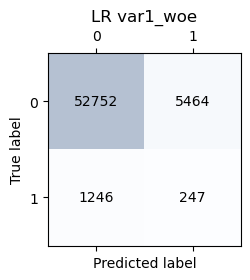

0.2967224371535279
              precision    recall  f1-score   support

           0     0.9899    0.2816    0.4384     58216
           1     0.0307    0.8881    0.0594      1493

    accuracy                         0.2967     59709
   macro avg     0.5103    0.5848    0.2489     59709
weighted avg     0.9659    0.2967    0.4289     59709



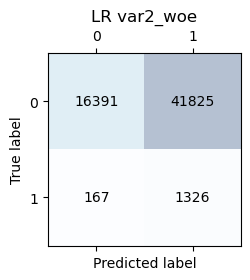

0.9015056356663149
              precision    recall  f1-score   support

           0     0.9765    0.9211    0.9480     58216
           1     0.0427    0.1373    0.0652      1493

    accuracy                         0.9015     59709
   macro avg     0.5096    0.5292    0.5066     59709
weighted avg     0.9532    0.9015    0.9259     59709



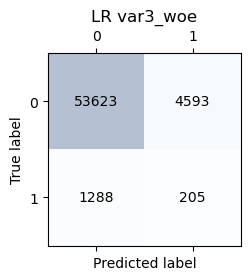

0.2888676748898826
              precision    recall  f1-score   support

           0     0.9901    0.2734    0.4284     58216
           1     0.0306    0.8935    0.0591      1493

    accuracy                         0.2889     59709
   macro avg     0.5103    0.5834    0.2438     59709
weighted avg     0.9661    0.2889    0.4192     59709



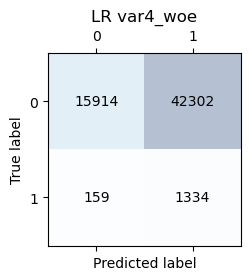

0.9749953943291632
              precision    recall  f1-score   support

           0     0.9750    1.0000    0.9873     58216
           1     0.0000    0.0000    0.0000      1493

    accuracy                         0.9750     59709
   macro avg     0.4875    0.5000    0.4937     59709
weighted avg     0.9506    0.9750    0.9627     59709



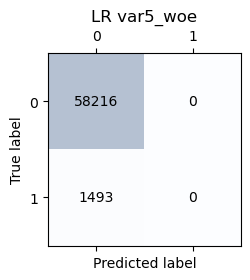

0.9749953943291632
              precision    recall  f1-score   support

           0     0.9750    1.0000    0.9873     58216
           1     0.0000    0.0000    0.0000      1493

    accuracy                         0.9750     59709
   macro avg     0.4875    0.5000    0.4937     59709
weighted avg     0.9506    0.9750    0.9627     59709



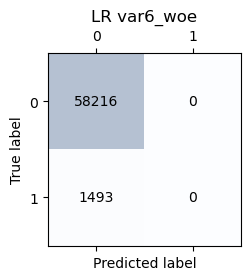

0.1056457150513323
              precision    recall  f1-score   support

           0     0.9799    0.0844    0.1555     58216
           1     0.0255    0.9324    0.0496      1493

    accuracy                         0.1056     59709
   macro avg     0.5027    0.5084    0.1025     59709
weighted avg     0.9560    0.1056    0.1528     59709



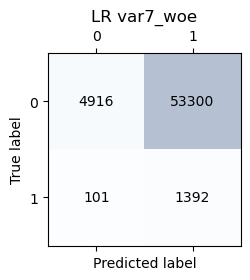

0.42236513758394884
              precision    recall  f1-score   support

           0     0.9844    0.4141    0.5830     58216
           1     0.0315    0.7441    0.0605      1493

    accuracy                         0.4224     59709
   macro avg     0.5080    0.5791    0.3218     59709
weighted avg     0.9606    0.4224    0.5699     59709



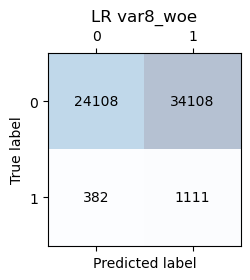

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


label=['var1_woe','var2_woe','var3_woe','var4_woe',
            'var5_woe','var6_woe','var7_woe','var8_woe'] 
listfeature=[['var1_woe'],['var2_woe'],['var3_woe'],['var4_woe'],
            ['var5_woe'],['var6_woe'],['var7_woe'],['var8_woe']]

clf = LogisticRegression(penalty='l2', 
                          C=1e-3,
                          solver='lbfgs',
                          random_state=1)
n=0
for i in listfeature:
    clf.fit(X_train[i], y_train)

    print(clf.score(X_test[i],y_test))
    print(classification_report(y_test, clf.predict(X_test[i]),digits=4))

    confmat = confusion_matrix(y_test, clf.predict(X_test[i]))
    #print(confmat)

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.title('LR '+label[n])
    plt.savefig('images/LR_log_confusion_matrix_'+label[n]+'.png', dpi=300)
    plt.show()
    n+=1

## Custom treshold Logistic regression

              precision    recall  f1-score   support

           0     0.9768    0.9424    0.9593     58216
           1     0.0541    0.1286    0.0762      1493

    accuracy                         0.9220     59709
   macro avg     0.5155    0.5355    0.5177     59709
weighted avg     0.9538    0.9220    0.9372     59709



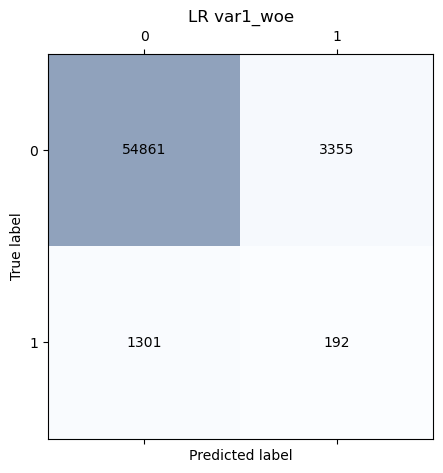

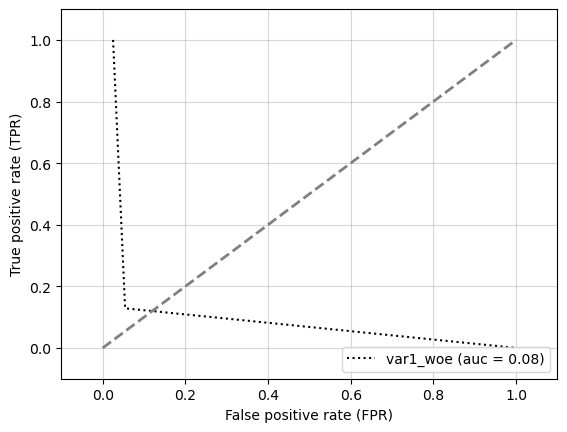

              precision    recall  f1-score   support

           0     0.9776    0.7925    0.8754     58216
           1     0.0348    0.2920    0.0622      1493

    accuracy                         0.7800     59709
   macro avg     0.5062    0.5423    0.4688     59709
weighted avg     0.9540    0.7800    0.8550     59709



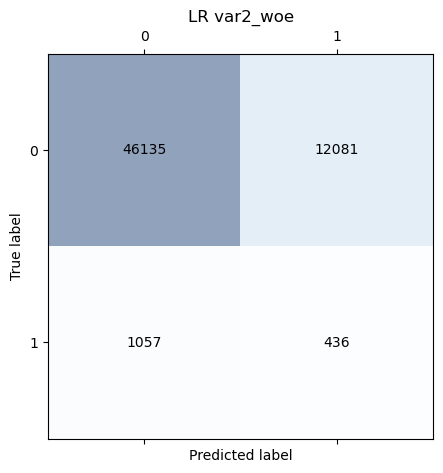

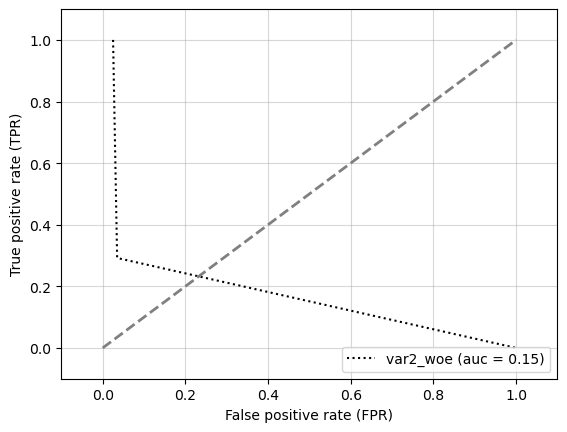

              precision    recall  f1-score   support

           0     0.9765    0.9211    0.9480     58216
           1     0.0427    0.1373    0.0652      1493

    accuracy                         0.9015     59709
   macro avg     0.5096    0.5292    0.5066     59709
weighted avg     0.9532    0.9015    0.9259     59709



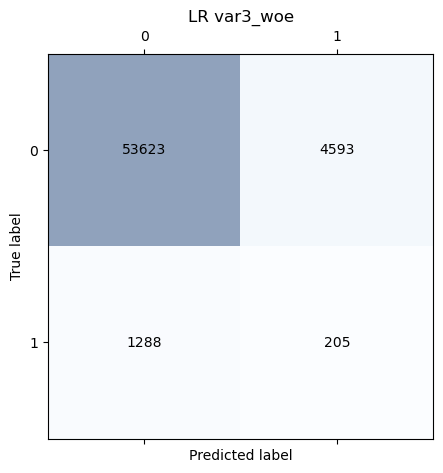

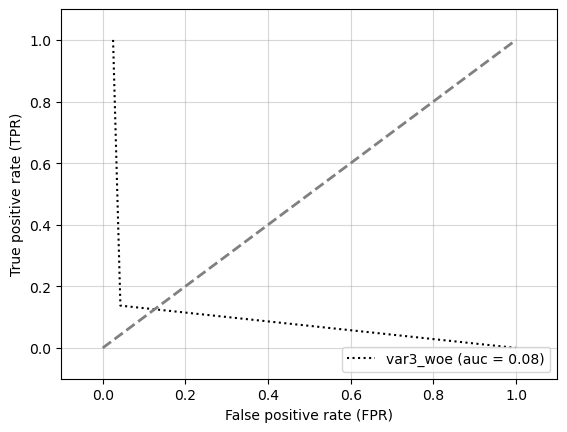

              precision    recall  f1-score   support

           0     0.9898    0.2760    0.4316     58216
           1     0.0305    0.8888    0.0590      1493

    accuracy                         0.2913     59709
   macro avg     0.5101    0.5824    0.2453     59709
weighted avg     0.9658    0.2913    0.4223     59709



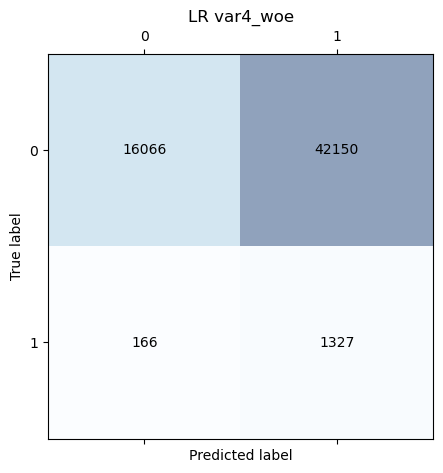

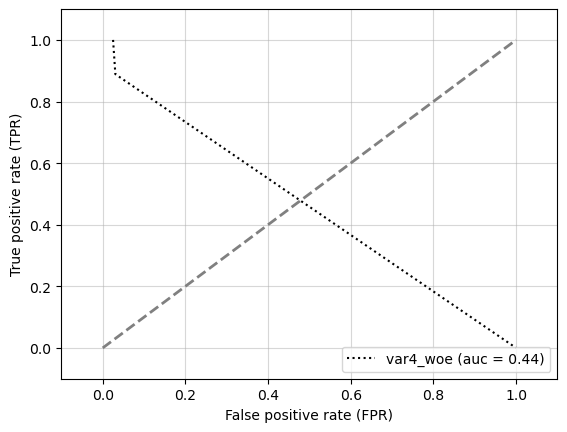

              precision    recall  f1-score   support

           0     0.9750    1.0000    0.9873     58216
           1     0.0000    0.0000    0.0000      1493

    accuracy                         0.9750     59709
   macro avg     0.4875    0.5000    0.4937     59709
weighted avg     0.9506    0.9750    0.9627     59709



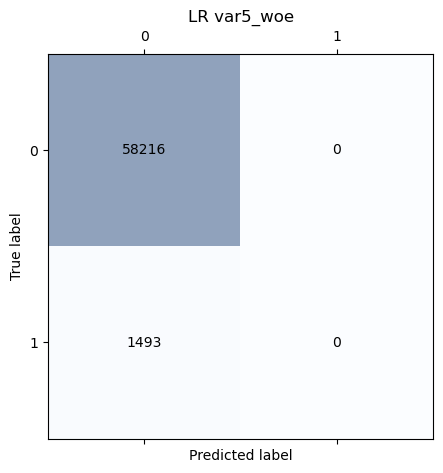

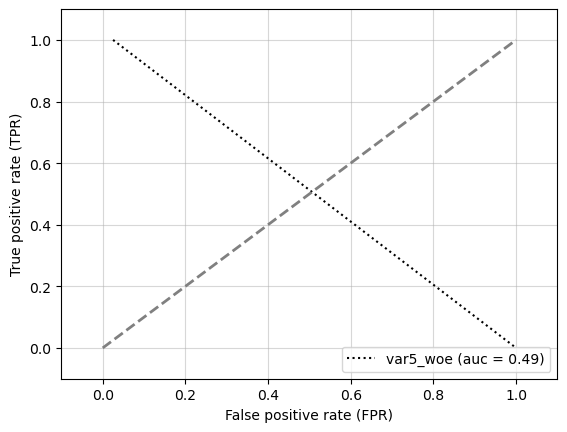

              precision    recall  f1-score   support

           0     0.9750    1.0000    0.9873     58216
           1     0.0000    0.0000    0.0000      1493

    accuracy                         0.9750     59709
   macro avg     0.4875    0.5000    0.4937     59709
weighted avg     0.9506    0.9750    0.9627     59709



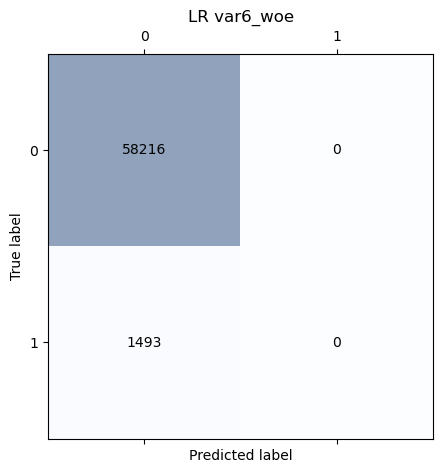

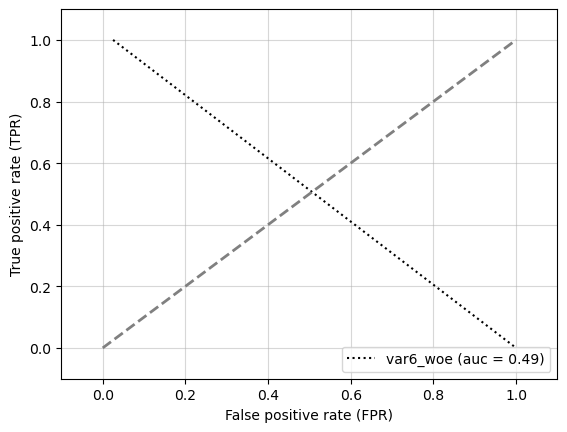

              precision    recall  f1-score   support

           0     0.9750    1.0000    0.9873     58216
           1     0.0000    0.0000    0.0000      1493

    accuracy                         0.9750     59709
   macro avg     0.4875    0.5000    0.4937     59709
weighted avg     0.9506    0.9750    0.9627     59709



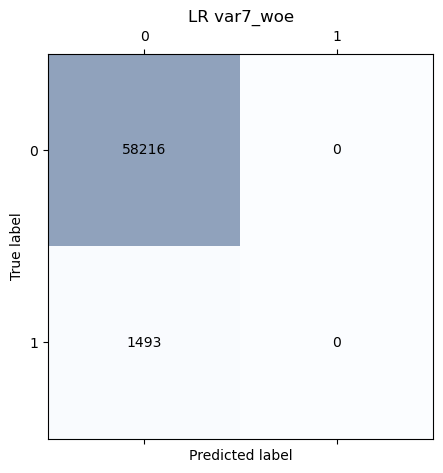

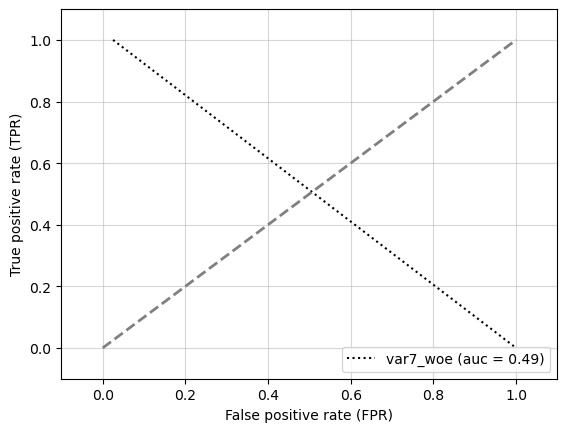

              precision    recall  f1-score   support

           0     0.9750    1.0000    0.9873     58216
           1     0.0000    0.0000    0.0000      1493

    accuracy                         0.9750     59709
   macro avg     0.4875    0.5000    0.4937     59709
weighted avg     0.9506    0.9750    0.9627     59709



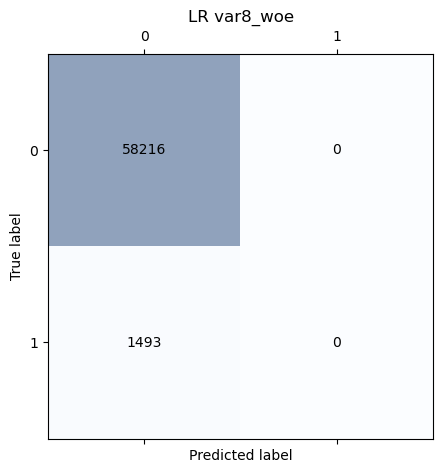

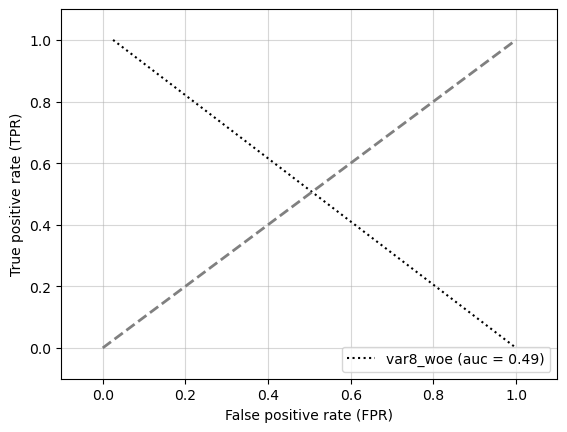

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_recall_curve

label=['var1_woe','var2_woe','var3_woe','var4_woe',
            'var5_woe','var6_woe','var7_woe','var8_woe'] 
listfeature=[['var1_woe'],['var2_woe'],['var3_woe'],['var4_woe'],
            ['var5_woe'],['var6_woe'],['var7_woe'],['var8_woe']]

clf = LogisticRegression(penalty='l2', 
                          C=1e-3,
                          solver='lbfgs',
                          random_state=1)
n=0
for i in listfeature:
    clf.fit(X_train[i], y_train)

    y_pred_new_threshold = (clf.predict_proba(X_test[i])[:,1]>=0.575).astype(int)
    
    print(classification_report(y_test, y_pred_new_threshold,digits=4))

    confmat = confusion_matrix(y_test, y_pred_new_threshold)
    #print(confmat)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.45)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.title('LR '+label[n])
    plt.savefig('images/LR_log_th_0.575_confusion_matrix_'+label[n]+'.png', dpi=300)
    plt.show()
    
'''    
    ##########################################
    fpr, tpr, thresholds = precision_recall_curve(y_test, y_pred_new_threshold)
    roc_auc = auc(x=fpr, y=tpr)
    
    plt.plot(fpr, tpr,
         color=clr,
         linestyle=ls,
         label='%s (auc = %0.2f)' % (label[n], roc_auc))
    
    
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1],
             linestyle='--',
             color='gray',
             linewidth=2)

    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.grid(alpha=0.5)
    plt.xlabel('False positive rate (FPR)')
    plt.ylabel('True positive rate (TPR)')
    plt.savefig('images/TPRvsFPR.png', dpi=300)
    plt.show()
   ''' 
    n+=1

In [171]:
import math
math.exp(1)
print(clf.coef_[0][0])
print(clf.intercept_[0])
fx=clf.intercept_[0]+clf.coef_[0][0]*0.217289
print(fx)
print(1/(1+math.exp(-fx)))

0.8801468760179753
-0.0004499453472361347
0.1907962891958337
0.5475548971193492


In [ ]:
if 1/(1+math.exp(-fx))>

In [161]:
clf.predict_proba(X_test[['var8_woe']])

array([[0.74155237, 0.25844763],
       [0.45244505, 0.54755495],
       [0.74155237, 0.25844763],
       ...,
       [0.45244505, 0.54755495],
       [0.45244505, 0.54755495],
       [0.45244505, 0.54755495]])

In [162]:
X_test[['var8_woe']]

,var8_woe
id,
0,-1.197076
1,0.217289
2,-1.197076
3,-1.197076
4,-1.197076
...,...
59704,0.217289
59705,0.217289
59706,0.217289


In [70]:
a=classification_report(y_test, y_pred_new_threshold,digits=4,output_dict=True)

In [77]:
a['weighted avg']['f1-score']
for i in a['weighted avg']:
    print(a['weighted avg'][i])

0.9506160189630803
0.9749953943291632
0.9626513780159688
59709


Logistic regression
              precision    recall  f1-score   support

           0     0.9769    0.9061    0.9402     58216
           1     0.0432    0.1654    0.0686      1493

    accuracy                         0.8876     59709
   macro avg     0.5101    0.5358    0.5044     59709
weighted avg     0.9536    0.8876    0.9184     59709



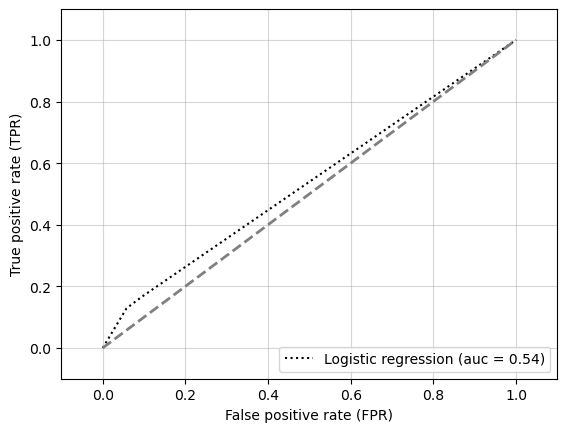

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import auc
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline

clf = LogisticRegression(penalty='l2', 
                          C=1e-3,
                          solver='lbfgs',
                          random_state=1)

pipe = Pipeline([['clf', clf]])


clf_labels = ['Logistic regression']

all_clf = [pipe]

X_test[['var1_woe']]

colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls \
        in zip(all_clf,
               clf_labels, colors, linestyles):
    print(label)
    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train[['var1_woe']],y_train).predict_proba(X_test[['var1_woe']])[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)

    
    print(classification_report(y_test, clf.predict(X_test[['var1_woe']]),digits=4))

    plt.plot(fpr, tpr,
         color=clr,
         linestyle=ls,
         label='%s (auc = %0.2f)' % (label, roc_auc))
    
    
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.savefig('images/TPRvsFPR.png', dpi=300)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


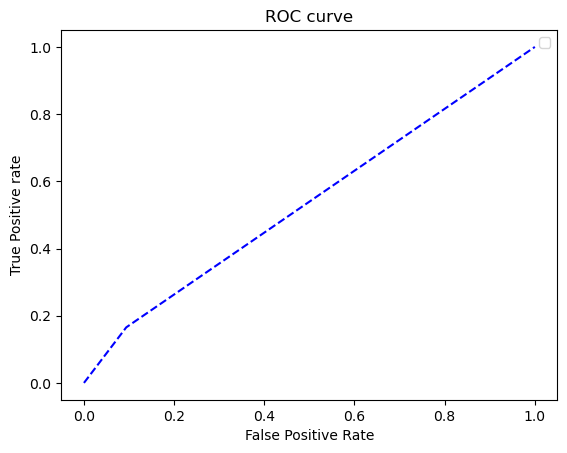

In [39]:
p_fpr, p_tpr, _ = roc_curve(y_test, clf.predict(X_test[['var1_woe']]), pos_label=1)

# plot roc curves
#plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
#plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
clf = LogisticRegression(penalty='l2', 
                          C=1e-4,
                          solver='lbfgs',
                          random_state=1)

clf.fit(X_train['var1_woe'].values.reshape(-1, 1), y_train)

clf.score(X_test['var1_woe'].values.reshape(-1, 1),y_test)


0.8876216315798289

In [81]:
print(1-y_train['event'].sum()/y_train.shape[0])
print(1-y_test['event'].sum()/y_test.shape[0])

0.9781011126523625
0.9781011126523625


In [53]:
for j in X_train.columns:
    print(j)

    for i in range(-5,6):
        clf = LogisticRegression(penalty='l2', 
                                  C=10**i,
                                  solver='lbfgs',
                                  random_state=1)

        clf.fit(X_train[j].values.reshape(-1, 1), y_train)

        print(i,'\t',clf.score(X_test[j].values.reshape(-1, 1),y_test))

var3_woe
-5 	 0.10912927699341808
-4 	 0.10912927699341808
-3 	 0.9015056356663149
-2 	 0.9015056356663149
-1 	 0.9015056356663149
0 	 0.9015056356663149
1 	 0.9015056356663149
2 	 0.9015056356663149
3 	 0.9015056356663149
4 	 0.9015056356663149
5 	 0.9015056356663149
var5_woe
-5 	 0.9749953943291632
-4 	 0.9749953943291632
-3 	 0.9749953943291632
-2 	 0.9749953943291632
-1 	 0.9749953943291632
0 	 0.9749953943291632
1 	 0.9749953943291632
2 	 0.9749953943291632
3 	 0.9749953943291632
4 	 0.9749953943291632
5 	 0.9749953943291632
var4_woe
-5 	 0.29129611951297124
-4 	 0.29129611951297124
-3 	 0.2888676748898826
-2 	 0.2888676748898826
-1 	 0.2888676748898826
0 	 0.2888676748898826
1 	 0.2888676748898826
2 	 0.2888676748898826
3 	 0.2888676748898826
4 	 0.2888676748898826
5 	 0.2888676748898826
var2_woe
-5 	 0.2967224371535279
-4 	 0.2967224371535279
-3 	 0.2967224371535279
-2 	 0.2967224371535279
-1 	 0.2967224371535279
0 	 0.2967224371535279
1 	 0.2967224371535279
2 	 0.29672243715352

In [92]:
X_train.columns

Index(['var3_woe', 'var6_woe', 'var4_woe', 'var1_woe', 'var5_woe', 'var7_woe',
       'var8_woe', 'var2_woe'],
      dtype='object')

In [83]:


for i in range(-10,11):
    clf = LogisticRegression(penalty='l2', 
                              C=10**i,
                              solver='lbfgs',
                              random_state=1)

    clf.fit(X_train, y_train.values.ravel())

    print(i,'\t',clf.score(X_test,y_test))

-10 	 0.9781011126523625
-9 	 0.9781011126523625
-8 	 0.9781011126523625
-7 	 0.9781011126523625
-6 	 0.9781011126523625
-5 	 0.9781011126523625
-4 	 0.9781011126523625
-3 	 0.9781011126523625
-2 	 0.9781011126523625
-1 	 0.9781011126523625
0 	 0.9781011126523625
1 	 0.9781011126523625
2 	 0.9781011126523625
3 	 0.9781011126523625
4 	 0.9781011126523625
5 	 0.9781011126523625
6 	 0.9781011126523625
7 	 0.9781011126523625
8 	 0.9781011126523625
9 	 0.9781011126523625
10 	 0.9781011126523625


In [ ]:
# https://stackoverflow.com/questions/28716241/controlling-the-threshold-in-logistic-regression-in-scikit-learn
import sklearn.metrics as metrics
'''
model = LogisticRegression(penalty='l2', 
                          C=1e-2,
                          solver='lbfgs',
                          random_state=1)
'''
model = SVC(random_state=1,kernel='linear',C=10,probability=True)

model.fit(X_train, y_train.values.ravel())

pred_proba_df = pd.DataFrame(model.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test.values.reshape(y_test.values.size,1),
                                           y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.values.reshape(y_test.values.size,1),
                           y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1)))

In [15]:
#max depth = 5

X_combined_std = np.vstack((X_train, X_test))
y_combined = np.column_stack((y_train, y_test))

from sklearn.tree import DecisionTreeClassifier
cval=5
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=cval, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, 
                      classifier=tree_model, test_idx=range(1000,2000))

plt.xlabel('age')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.legend(loc='upper left')
#plt.tight_layout()
plt.title('max_depth='+str(cval))
plt.savefig('images/decision_depth'+str(cval)+'.png', dpi=300)
plt.show()

score = tree_model.score(X_test, y_test)
score

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 179127 and the array at index 1 has size 59709

In [12]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('magenta', 'blue', 'lightgreen', 'red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')   

In [46]:
# Logistic regression model

logistic = LogisticRegression(penalty='l2', 
                              C=10e-2,
                              solver='lbfgs',
                              random_state=1)

model = logistic.fit(X_train, y_train)

# Predicted probability of 2 classes
y_predict_prob = model.predict_proba(X_test)

# Predicted probability of class 1
y_predict_prob_class_1 = y_predict_prob[:,1]

for i in range(10,51,2):

    # Classification based on Self-defined threshold
    y_predict_class = [1 if prob > i*1e-3 else 0 for prob in y_predict_prob_class_1]

    # Model evaluation on accuracy
    print("Accuracy:", round(accuracy_score(y_test, y_predict_class), 10),i)
    
  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.0252558241 10
Accuracy: 0.0252558241 12
Accuracy: 0.0252558241 14
Accuracy: 0.0252558241 16
Accuracy: 0.0252558241 18
Accuracy: 0.0252558241 20
Accuracy: 0.0339144853 22
Accuracy: 0.0343499305 24
Accuracy: 0.8611097155 26
Accuracy: 0.9516990738 28
Accuracy: 0.9727846723 30
Accuracy: 0.974727428 32
Accuracy: 0.9747441759 34
Accuracy: 0.9747441759 36
Accuracy: 0.9747441759 38
Accuracy: 0.9747441759 40
Accuracy: 0.9747441759 42
Accuracy: 0.9747441759 44
Accuracy: 0.9747441759 46
Accuracy: 0.9747441759 48
Accuracy: 0.9747441759 50
Accuracy: 0.9747441759


In [84]:
# Classification based on Self-defined threshold
y_predict_class = [1 if prob > 2575e-5 else 0 for prob in y_predict_prob_class_1]

# Model evaluation on accuracy
print("Accuracy:", round(accuracy_score(y_test, y_predict_class), 10))

ValueError: Found input variables with inconsistent numbers of samples: [33883, 59709]

In [60]:
np.histogram(y_predict_prob_class_1)

(array([  417,   152,    12, 39440, 14763,  3241,   835,   724,    99,
           26], dtype=int64),
 array([0.02015691, 0.02139199, 0.02262706, 0.02386214, 0.02509722,
        0.0263323 , 0.02756738, 0.02880246, 0.03003754, 0.03127262,
        0.0325077 ]))

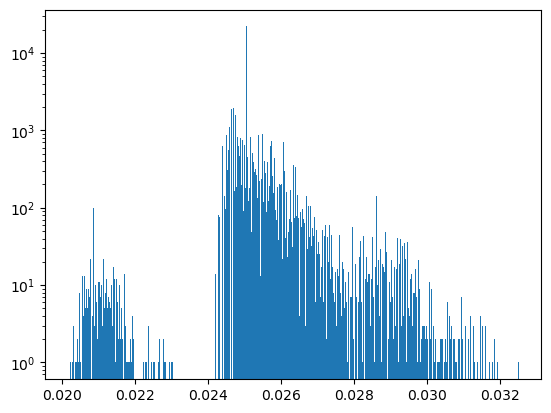

In [62]:
plt.hist(y_predict_prob_class_1, bins='auto',log=True)
plt.show()

In [8]:
from datetime import datetime
date=datetime.today().strftime('%Y%m%d')
date

'20230429'